# **Projet Uber**

# Partie 0 : Import du dataset et des libraries

Au départ, je voulais travailler sur un dataset complet de l'année 2014, mais après plusieurs tests, travailler sur celui-ci pose problème :
- les cartes ne s'affichent pas
- le dbscan fait planter mon ordinateur
- les bases de données sont trop valumineuses pour être importées sur GitHub

Ainsi, je ne vais travailler que sur les données d'un mois (j'ai choisi avril).

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px 

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings("ignore")

## Import de dataset_apr14

In [4]:
dataset_apr14 = pd.read_csv("Tables/uber-raw-data-apr14.csv")
dataset_apr14

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


# Partie 1: Exploration des tables et Preprocessing

In [5]:
print("Number of rows :", dataset_apr14.shape[0])
print()

print("Display of dataset_apr14 :")
display(dataset_apr14.head())
print()

print("Basics statistics :")
display(dataset_apr14.describe(include="all"))
print()

print("Percentage of missing values :")
display(100*dataset_apr14.isnull().sum()/dataset_apr14.shape[0])

Number of rows : 564516

Display of dataset_apr14 :


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512



Basics statistics :


,Date/Time,Lat,Lon,Base
count,564516,564516.000000,564516.000000,564516
unique,41999,NaN,NaN,5
top,4/7/2014 20:21:00,NaN,NaN,B02682
freq,97,NaN,NaN,227808
mean,NaN,40.740005,-73.976817,NaN
std,NaN,0.036083,0.050426,NaN
min,NaN,40.072900,-74.773300,NaN
25%,NaN,40.722500,-73.997700,NaN
50%,NaN,40.742500,-73.984800,NaN
75%,NaN,40.760700,-73.970000,NaN



Percentage of missing values :


Date/Time    0.0
Lat          0.0
Lon          0.0
Base         0.0
dtype: float64

Il ne manque aucune valeur.

## Feature Engineering

In [6]:
dataset_apr14["Date/Time"][0]

'4/1/2014 0:11:00'

On va convertir la colonne Date/Time au format Datetime

In [7]:
from datetime import datetime

dataset_apr14["timeStamp"] = dataset_apr14["Date/Time"].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M:%S'))

dataset_apr14.head()

,Date/Time,Lat,Lon,Base,timeStamp
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00


On va de plus créer plusieurs colonnes en lien avec la date :
- month
- dayofmonth
- dayofweeknum
- dayofweek
- hour

In [8]:
dataset_apr14["month"] = dataset_apr14["timeStamp"].dt.month
dataset_apr14["dayofmonth"] = dataset_apr14["timeStamp"].dt.day
dataset_apr14["dayofweeknum"] = dataset_apr14["timeStamp"].dt.dayofweek
dataset_apr14["dayofweek"] = dataset_apr14["timeStamp"].dt.day_name()
dataset_apr14["hour"] = dataset_apr14["timeStamp"].dt.hour

dataset_apr14.head()

,Date/Time,Lat,Lon,Base,timeStamp,month,dayofmonth,dayofweeknum,dayofweek,hour
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,4,1,1,Tuesday,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,4,1,1,Tuesday,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,4,1,1,Tuesday,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,4,1,1,Tuesday,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,4,1,1,Tuesday,0


## EDA

### Variable Base

In [9]:
dataset_apr14["Base"].value_counts()

Base
B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: count, dtype: int64

Cette colonne représente les différentes bases Uber présentes à New York.

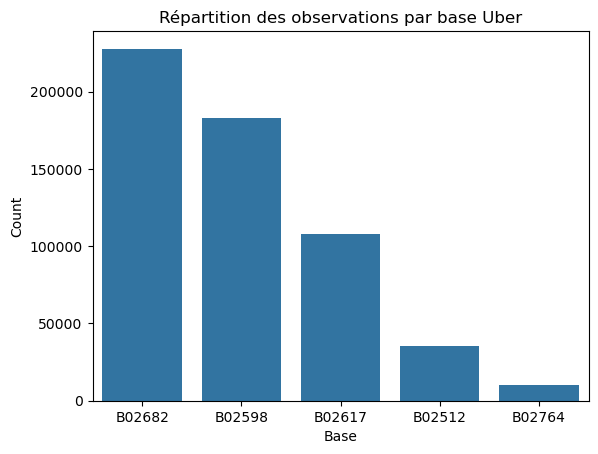

In [10]:
sns.barplot(x=dataset_apr14["Base"].value_counts().index, y=dataset_apr14["Base"].value_counts().values)
plt.ylabel("Count")
plt.title("Répartition des observations par base Uber")
plt.show()

### Variables temporelles

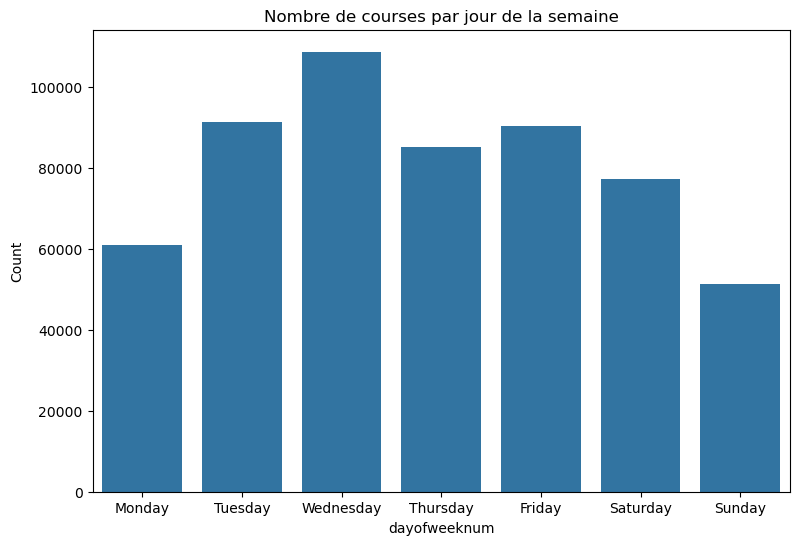

In [11]:
plt.figure(figsize=(9,6))
sns.barplot(x=dataset_apr14["dayofweeknum"].value_counts().index, y=dataset_apr14["dayofweeknum"].value_counts().values)
plt.xticks(ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.ylabel("Count")
plt.title("Nombre de courses par jour de la semaine")
plt.show()

Le jour où il y a le plus de courses est le mercredi.
Le jour où il y a le moins de courses est le dimanche.

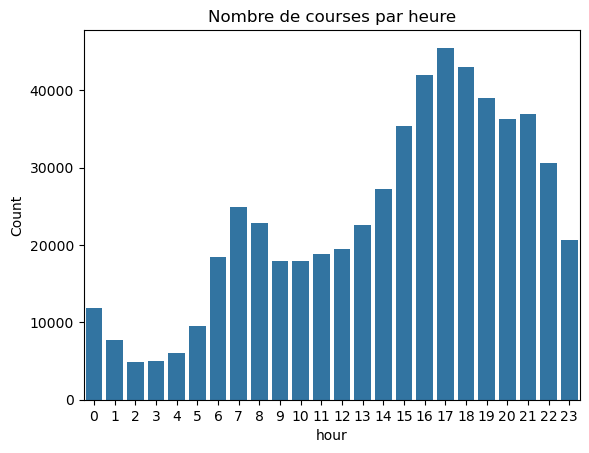

In [12]:
sns.barplot(x=dataset_apr14["hour"].value_counts().index, y=dataset_apr14["hour"].value_counts().values)
plt.ylabel("Count")
plt.title("Nombre de courses par heure")
plt.show()

Le nombre de courses est plus élevé le soir et en fin d'après-midi (de 15h à 22h.) \
Le nombre de courses est moins élevé la nuit (de 0h à 5h).

# Partie 2 : Travail avec un échantillon

Comme la base est assez grande, nous allons d'abord travailler sur un échantillon. On va choisir de ne garder que les observations qui ont eu lieu le 1er avril 2014.

In [13]:
dataset_apr14.head()

,Date/Time,Lat,Lon,Base,timeStamp,month,dayofmonth,dayofweeknum,dayofweek,hour
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,4,1,1,Tuesday,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,4,1,1,Tuesday,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,4,1,1,Tuesday,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,4,1,1,Tuesday,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,4,1,1,Tuesday,0


In [14]:
dataset_apr14_sample = dataset_apr14[(dataset_apr14["month"] == 4) & (dataset_apr14["dayofmonth"] == 1)]
dataset_apr14_sample.shape

(14546, 10)

## Partie 2-1 : Preprocessing

On crée X.

In [15]:
X = dataset_apr14_sample[["Lat", "Lon"]]
X.head()

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722


On applique le preprocessing sur X.

In [16]:
numeric_features = []
categorical_features = []
for i,t in X.dtypes.items():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Lat', 'Lon']
Found categorical features  []


In [17]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [18]:
print("Performing preprocessings on train set...")
print(X.head())
X_train = preprocessor.fit_transform(X)
print('...Done.')
print(X_train[0:5])
print()

Performing preprocessings on train set...
       Lat      Lon
0  40.7690 -73.9549
1  40.7267 -74.0345
2  40.7316 -73.9873
3  40.7588 -73.9776
4  40.7594 -73.9722
...Done.
[[ 0.7672978   0.41505401]
 [-0.38027247 -1.10899284]
 [-0.2473388  -0.20528667]
 [ 0.49057872 -0.01956739]
 [ 0.50685632  0.08382272]]



## Partie 2-2 : KMeans

On utilise la méthode Elbow pour trouver le nombre de clusters optimal.

In [19]:
from sklearn.cluster import KMeans
wcss = [] # On fait une liste avec nos scores wcss
k_elbow = [] # on fait une liste avec nos nombres de clusters
for i in range(1,11): # On teste pour K compris entre 1 et 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    k_elbow.append(i)

wcss

[29091.999999999993,
 20912.999720449498,
 13938.996588360269,
 11178.564989024302,
 8912.17179975936,
 6967.71607175549,
 5835.689654482546,
 5026.698540644338,
 4450.965557561813,
 4018.994198535148]

Affinons notre hypothèse avec la méthode Silhouette.

In [20]:
from sklearn.metrics import silhouette_score

sil = []
k_sil = []


for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, random_state = 42)
    kmeans.fit(X_train)
    sil.append(silhouette_score(X_train, kmeans.predict(X_train)))
    k_sil.append(i)

sil

[0.7324401058818198,
 0.43688359323156345,
 0.4543763073861173,
 0.4209065246411869,
 0.4810020453812687,
 0.4916649581535743,
 0.4461508161525282,
 0.4022331809194947,
 0.40775061756008235]

Affichons ces scores sur un graphique.

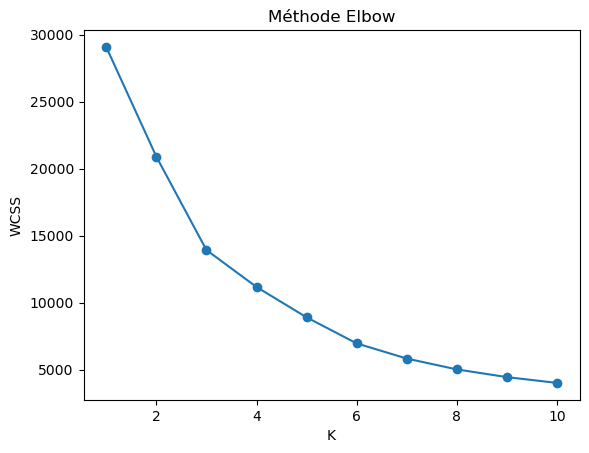

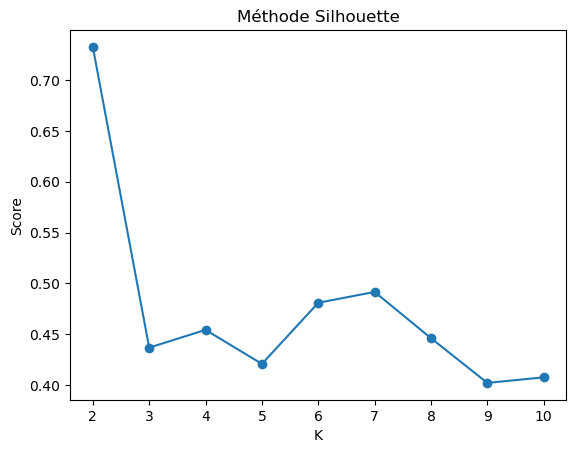

In [21]:
plt.figure()
plt.plot(k_elbow, wcss, marker="o")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Méthode Elbow")

plt.figure()
plt.plot(k_sil, sil, marker="o")
plt.xlabel("K")
plt.ylabel("Score")
plt.title("Méthode Silhouette")

plt.show()

K = 3 ou K = 7 semble être un bon choix.

In [22]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=0)

In [23]:
dataset_apr14_sample["cluster_kmeans"] = kmeans.predict(X_train)
dataset_apr14_sample.head()

,Date/Time,Lat,Lon,Base,timeStamp,month,dayofmonth,dayofweeknum,dayofweek,hour,cluster_kmeans
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,4,1,1,Tuesday,0,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,4,1,1,Tuesday,0,2
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,4,1,1,Tuesday,0,2
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,4,1,1,Tuesday,0,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,4,1,1,Tuesday,0,0


In [24]:
fig = px.scatter_mapbox(
        dataset_apr14_sample, 
        lat="Lat", 
        lon="Lon",
        color="cluster_kmeans",
        mapbox_style="carto-positron"
)

fig.show()

## Partie 2-3 : DBSCAN

In [25]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.16, min_samples=50, metric="manhattan") 
db.fit(X_train)

DBSCAN(eps=0.16, metric='manhattan', min_samples=50)

Regardons le nombre de clusters que le modèle a créés.

In [26]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

On a 5 clusters (-1 représente les outliers) \
Ajoutons une nouvelle colonne "cluster" à X qui correspond à l'étiquette du cluster correspondant.

In [27]:
dataset_apr14_sample["cluster_dbscan"] = db.labels_
dataset_apr14_sample.head()

,Date/Time,Lat,Lon,Base,timeStamp,month,dayofmonth,dayofweeknum,dayofweek,hour,cluster_kmeans,cluster_dbscan
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,4,1,1,Tuesday,0,0,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,4,1,1,Tuesday,0,2,-1
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,4,1,1,Tuesday,0,2,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,4,1,1,Tuesday,0,0,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,4,1,1,Tuesday,0,0,0


Visualisons tous les points sauf les outliers.

In [28]:
fig = px.scatter_mapbox(
        dataset_apr14_sample[dataset_apr14_sample["cluster_dbscan"] != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster_dbscan",
        mapbox_style="carto-positron"
)

fig.show()

# Partie 3 : Travail sur le dataset d'un mois

In [29]:
dataset_apr14.head()

,Date/Time,Lat,Lon,Base,timeStamp,month,dayofmonth,dayofweeknum,dayofweek,hour
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,4,1,1,Tuesday,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,4,1,1,Tuesday,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,4,1,1,Tuesday,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,4,1,1,Tuesday,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,4,1,1,Tuesday,0


## Partie 3-1 : Preprocessing

On crée X.

In [30]:
X = dataset_apr14[["Lat", "Lon"]]
X.head()

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722


On applique le preprocessing sur X.

In [31]:
# Le preprocessor est déjà créé
print("Performing preprocessings on train set...")
print(X.head())
X_train = preprocessor.fit_transform(X)
print('...Done.')
print(X_train[0:5])
print()

Performing preprocessings on train set...
       Lat      Lon
0  40.7690 -73.9549
1  40.7267 -74.0345
2  40.7316 -73.9873
3  40.7588 -73.9776
4  40.7594 -73.9722
...Done.
[[ 0.8035544   0.43463557]
 [-0.36873718 -1.14392195]
 [-0.23293981 -0.20789287]
 [ 0.52087416 -0.01553096]
 [ 0.53750241  0.09155711]]



## Partie 3-2 : KMeans

In [32]:
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X_train)

KMeans(n_clusters=7, random_state=0)

In [33]:
dataset_apr14["cluster_kmeans"] = kmeans.predict(X_train)
dataset_apr14.head()

,Date/Time,Lat,Lon,Base,timeStamp,month,dayofmonth,dayofweeknum,dayofweek,hour,cluster_kmeans
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,4,1,1,Tuesday,0,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,4,1,1,Tuesday,0,2
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,4,1,1,Tuesday,0,2
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,4,1,1,Tuesday,0,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,4,1,1,Tuesday,0,0


On va afficher 7 graphiques, 1 par jour de la semaine. \
La base de données étant beaucoup trop grande pour ce genre d'affichage (j'ai essayé quand même...), on va se restreindre au mois d'avril pour l'affichage.

In [ ]:
import plotly.express as px

for day in range(7):  
    day_data = dataset_apr14[dataset_apr14["dayofweeknum"] == day]  
    
    if not day_data.empty:
        fig = px.scatter_mapbox(
            day_data[day_data["cluster_kmeans"] != -1],
            lat="Lat",
            lon="Lon",
            color="cluster_kmeans",
            mapbox_style="carto-positron",
            title="Carte pour {}".format(day_data["dayofweek"].values[0])
        )
        fig.show()


Les groupements qui apparaissent ne sont pas vraiment des "clusters", car on ne prend pas vraiment en compte la sensité de demande. \
De plus, tous les points sont affichés, même dans les zones où les demandes sont faibles. \
Ainsi un algorithme DBSCAN semble plus pertinent.

## Partie 3-3 : DBSCAN

Je ne peux pas faire tourner un modèle DBSCAN sur un mois entier (pas assez de mémoire). \
Ainsi on va séparer le dataset_avril_14 par jour de la semaine.

In [ ]:
db = DBSCAN(eps=0.16, min_samples=300, metric="manhattan") 

for day in range(7) :
        day_data = dataset_apr14[dataset_apr14["dayofweeknum"] == day]
        # On crée X
        X = day_data[["Lat", "Lon"]]
        # Preprocessing
        X_train = preprocessor.fit_transform(X)
        # On entraine
        db.fit(X_train)
        # On met les labels dans day_data
        day_data["cluster_dbscan"] = db.labels_
        # On affiche la carte
        fig = px.scatter_mapbox(
                day_data[day_data["cluster_dbscan"] != -1], 
                lat="Lat", 
                lon="Lon",
                color="cluster_dbscan",
                mapbox_style="carto-positron",
                title="Carte pour {}".format(day_data["dayofweek"].values[0])
        )

        fig.show()

Le modèle DBSCAN est bien plus adapté pour ce problème ! En effet, on voit clairement des clusters se dessiner !
Ainsi les chauffeurs Uber devraient se concentrer sur les zones suivantes :
- Manhattan Sud (jusqu'à Upper West Side / Upper East Side)
- Greenpoint et Downtown Brooklyn dans le comté de Brooklyn
- Le Newark Liberty International Airport et LaGuardia Airport (sauf le samedi)
- Le John F. Kennedy International Airport